<a href="https://colab.research.google.com/github/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第二章 畳み込みニューラルネットワークとコンピュータービジョン

ディープラーニングが最も大きな成功を収めた分野といえばコンピュータービジョンでしょう。本章ではコンピュータービジョンの領域で広く用いられる畳み込みニューラルネットワークの基本的な仕組みと代表的なアーキテクチャについて学んでいきます。

## 2.1 コンピュータービジョンとは

コンピュータービジョンはその名の通りコンピューターに動物の視覚能力を与える技術です。例えば、カメラやビデオの画像に写っているモノや人の顔などのオブジェクトやそのオブジェクトの特徴である形、色、数などをコンピューターで認識させます。本節ではコンピュータービジョンの利用シーンをイメージしていただくための情報を提供します。




### コンピュータービジョンのさまざまなアプリケーション

コンピュータービジョンを利用したアプリケーションとしては、のちほど紹介するYOLOというアルゴリズムに代表される一般物体認識のほかに、顔認識、年齢推定などがあります。さらに応用的な話でいうと、ひびが入っているのかを見つけるような老朽箇所の検知などがあります。また、一般物体認識のようにボックスで物体を認識するのではなく、画像のピクセルごとにクラスの分類を行うセグメンテーションという分野でも用いられています。その他、文字認識の領域でも畳み込みニューラルネットワークが使われています。

![cv_app](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_cv_app.png?raw=1)
<center>コンピュータービジョンのアプリケーションの例</center>




## 2.2 畳み込みニューラルネットワークとは

そもそも畳み込みとは、ある関数に対して別の関数を平行移動させながら重ねて足し合わせる演算のことを指す数学用語です。現状ディープラーニングでは、画像認識に最も適したアーキテクチャーが畳み込みニューラルネットワークで、その名の通り畳み込み処理を用いています。ここではニューラルネットワークにおける畳み込み処理の仕組みと動作について理解を深めることで畳み込みニューラルネットワークの基本を押さえましょう。




### 畳み込みニューラルネットワークの仕組み

下図を使って畳み込みの基本的な説明をします。図の真ん中の行列が左の人物の画像の耳の部分のピクセルの画素値になります。図の例ではカラー（3チャンネル）の画像になっていますが、以下の説明では説明を簡単にするために、グレースケール（1チャンネル）の画像と仮定して話を進めます。

畳み込みでは、畳み込みフィルターだとかカーネルなどと呼ばれる、画像の一定の範囲の特徴を把握するのに用いられる行列を用意します。この畳み込みフィルターを使って畳み込みと呼ばれる行列計算を行います。畳み込みフィルターの大きさは任意に決めることができますが、今回の例では3×3の行列としています。

![conv](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_conv.png?raw=1)
<center>二次元の畳み込み計算の定義と一例</center>

画像における畳み込み処理では、処理の対象のピクセルとその周辺のピクセルに対し、同じ相対位置にある畳み込みフィルターの値をそれぞれ掛け合わせて和を取ります。例えば、処理対象のピクセル（図中央の行列の真ん中）の値が82だとしたら、画像の行列の一番左上の要素と畳み込みフィルターの一番左上の要素の掛け算（144×(-1)）を行い、真ん中上同士の掛け算（60×0）を行い、一番右上同士の掛け算（19×(-2)）を行い、…という具合に、それぞれの同じ相対位置にある要素ごとの掛け算（行列の要素ごとの積）を行ったのち、それらの計算結果の総和を取ります。画像全体を走査するように繰り返しこの計算を行います。

この操作自体は非常に簡単です。ただしこれを教科書に出てくるような図の左にある式で表現すると、一見非常に複雑で慣れてない方には暗号のように添え字も非常に多く理解し辛いものになるかと思います。（もちろん慣れている方にはむしろ数式で表してくれた方が誤解がなくわかりやすいのですが。）ただしさきほどのように実行している操作自体は非常にシンプルですのでその点を理解してください。




### 畳み込みの計算のイメージ

これから畳み込みフィルターを使った画像データに対する畳み込みの計算方法について具体的に説明します。下図は、バスケットボールの画像の拡大図です。畳み込みの計算は図のように左上からはじまって、赤い四角で囲まれたピクセルを含むその周りの9つのピクセルに対して畳み込み計算を行い、つぎにstrideというパラメーターで指定された幅の分だけフィルターを横にずらして再度畳み込み計算を行う、というような操作を延々と繰り返していきます。

![ball_zoom](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_ball_zoom.png?raw=1)
<center>畳み込み計算のスタート地点</center>

畳み込みがどのようなことに有効なのかイメージいただけるよう解説します。下図の左のバスケットボールの画像に真ん中の畳み込みフィルターを掛け合わせてあげると、右図のように変換されます。

![ball_conv](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_ball_conv.png?raw=1)
<center>ボールの画像に作用させる畳み込みフィルターと処理の結果の例 (to be replaced)</center>

図中央の一番上の畳み込みフィルターは行列の真ん中の値が0で、左側が正の値、右側が負の値という形をしています。これを用いて畳み込み計算すると、左側が明るくて右側が暗いような部分のピクセルの値が大きくなります。逆に、左側が暗くて右側が明るいような部分のピクセル値の値は小さな値が返ってきます。このフィルターを使って畳み込み計算を行った結果が図の右上の画像になりますが、たしかに左側が明るくなっている部分のエッジがうまく検出できているのがわかります。

真ん中の畳み込みフィルターはその逆パターンで、右側が明るかったら大きな値を返すものですので、図の右側の真ん中の画像を見ればおわかりの通り、右側が明るいエッジを検出しています。

下の畳み込みフィルターは、下側が明るかったら大きな値を返すもので、図の右側の下の画像をみると、下側のエッジがうまく検出できています。このように別々の畳み込みフィルターを使用することで、異なるエッジを抽出することができます。

では、Kerasを用いたサンプルプログラムを動かしながらこちらのバスケットボールの画像に対して畳み込み処理の動作を見ていきましょう。バスケットボールの画像は以下のようにしてカレントディレクトリにダウンロードしておいてください。

In [0]:
!wget https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/data/basketball.png

--2020-02-03 04:26:23--  https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/data/basketball.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203705 (199K) [image/png]
Saving to: ‘basketball.png’

basketball.png      100%[===================>] 198.93K  --.-KB/s    in 0.03s   

2020-02-03 04:26:23 (6.29 MB/s) - ‘basketball.png’ saved [203705/203705]



まず、今回用いるモジュールをインポートします。

In [0]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

つぎにKerasの`load_img`メソッド (`tf.keras.preprocessing.image.load_img`) を用いてバスケットボール画像を読み込みます。

In [0]:
# 画像の読み込み
img = image.load_img('basketball.png', target_size=(224, 224))
# PIL形式からnumpy形式に変換
img_numpy = image.img_to_array(img).astype('uint8')
print('元のshape:', img_numpy.shape)
# (height, width, channel) -> (minibatch, height, width, channel)
img_numpy = np.expand_dims(img_numpy, axis=0)
print('変換後のshape:', img_numpy.shape)

元のshape: (224, 224, 3)
変換後のshape: (1, 224, 224, 3)


`load_img`メソッドで読み込んだ画像データはフォーマットがPIL (Python Image Library) になっています。PIL形式のデータをNumpy形式の配列に変換します。その際、配列の各要素のデータ形式を8ビット符号なし整数（`uint8`）に変換するための`.astype(‘uint8’)`という型変換も同時に行っています。また、その次の行の`np.expand_dims`という関数では、第二引数の`axis`で指定された次元の前にひとつ次元を追加しています。そのため、画像の形について`print`関数を使って出力すると、`(1, 244, 244, 3)`のように最初に1次元追加されています。ここで1次元増やしている理由は、Kerasの`Conv2D`などのレイヤーでは画像データの次元はNHWC（画像数, 画像の高さ, 画像の幅, チャンネル数）の4次元であることを仮定しているからです。

読み込んだ画像は以下のようにmatplotlibの`imshow`メソッドを使って表示できます。

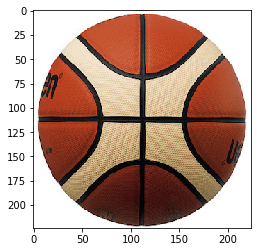

In [0]:
plt.imshow(img_numpy[0])

簡単のため、ここではゼロチャンネル目だけを取り出してグレースケールの画像として扱います。

(1, 224, 224)
(1, 224, 224, 1)


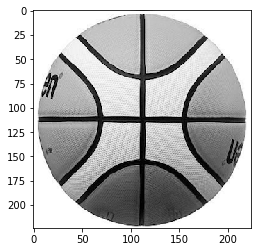

In [0]:
x = img_numpy[:, :, :, 0]
print(x.shape)  # => (1, 224, 224)
x = np.expand_dims(x, axis=3)  # 調整
print(x.shape)  # => (1, 224, 224, 1)
plt.imshow(np.squeeze(x), cmap='gray')

つぎに畳み込み処理を行うレイヤーを用意します。

In [0]:
# convolution layerを用意
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=1, kernel_size=(3, 3), input_shape=(224, 224, 1))
])

さきほどの畳み込みフィルターを再現するために、`Conv2D`と呼ばれるレイヤーを使います。Conv2Dとは2次元の畳み込みを意味します。Convというのが畳み込みを表す英単語Convolutionの略で、2Dは2次元を意味します。引数はそれぞれ、畳み込みフィルターの数が1つ、フィルター（カーネル）の大きさが3×3、入力の画像データの大きさが224×224で、カラーなのでチャンネル数は3であることを指定しています。

このように畳み込みレイヤーを用意してあげると、3×3の畳み込みフィルターはそれぞれ適当な値で初期化されています。



[[[[ 0.21025038]]

  [[ 0.1189602 ]]

  [[-0.5769575 ]]]


 [[[-0.01090032]]

  [[-0.08541563]]

  [[-0.4095564 ]]]


 [[[-0.11865038]]

  [[ 0.22036088]]

  [[ 0.10928792]]]]
weight.shape: (3, 3, 1, 1)


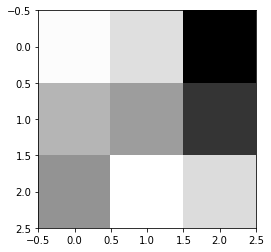

In [0]:
weight, bias = model.layers[0].get_weights()
print('weight.shape:', weight.shape)  # => (3, 3, 3, 1): (高さ, 幅, 入力チャンネル数, フィルター数)
# フィルターの4つめの次元を除外(squeeze)し、ゼロチャンネル目を描画
plt.imshow(np.squeeze(weight[:, :, 0]), cmap='gray')
plt.colorbar()

さきほどのバスケットボールの画像に対するフィルター処理を再現するために、畳み込みフィルターを強制的に設定するところをお見せします。普段の畳み込み処理では今から説明する`get_weights`や`set_weights`を用いた処理は基本的に必要ありませんのでその点はご注意ください。



In [0]:
# 左側が明るくて右側が暗いエッジを検出するフィルター
w1 = np.array([[[[1]], [[0]], [[-1]]], 
               [[[2]], [[0]], [[-2]]], 
               [[[1]], [[0]], [[-1]]]],
              dtype='float32') 
print(w1.shape)  # => (3, 3, 1, 1)

(3, 3, 1, 1)


`set_weights`というメソッドを用いて手動で畳み込みフィルターの配列を取りこみます。つぎにここではさきほどお見せした左側が明るかったら大きい値を返すような左のエッジを検出するための畳み込みフィルターの値をnp.arrayクラスを使って設定します。最後にset_weightsメソッドを使ってその畳み込みフィルターの配列を設定し、その畳み込みフィルターについて再度imshowメソッドを使って可視化しています。

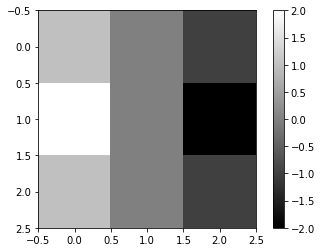

In [0]:
# 先ほど用意したconvolution layerにフィルターをセット
b = np.array([0.], dtype='float32')  # バイアスは0
model.layers[0].set_weights([w1, b])
# フィルターの可視化
plt.imshow(np.squeeze(model.layers[0].get_weights()[0][:, :, 0]), cmap='gray')
plt.colorbar()

つぎにpredictメソッドを用いてモデルの予測を行ったあと、畳み込みフィルターで変換された画像を見やすくするために、フィルター化された画像の画素を平均値で引き、標準偏差で割った値に標準化して`imshow`メソッドで可視化します。このような処理をすると最終的にさきほどお見せした以下の画像が得られます。

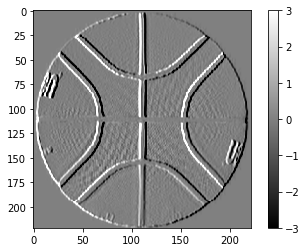

In [0]:
filtered = model.predict(x)
filtered -= filtered.mean()
filtered /= filtered.std()
plt.imshow(np.squeeze(filtered), cmap='gray', vmin=-3, vmax=3)
plt.colorbar()

実際にステップバイステップで畳み込みのフィルターがどのような演算をしているかお目にかかる機会も少ないのではないかと思います。ほかの畳み込みフィルターについてもサンプルコードに含まれておりますので、興味がある方はぜひご自身で動かしてみてください。




### ストライドとパディングについて

取り込んだ画像に対して畳み込みフィルターをずらしながら畳み込み処理を行っていく必要があります。この時、ストライドとパディングというパラメータを設定します。具体的に畳み込みフィルターをずらしていくための動作を理解しておくことで、実践でのパラメータ設定の参考にしてください。

ストライドはどのくらいのステップで畳み込みフィルターを動かすかを決める値です。ストライドを`stride=(1,1)`のように設定した場合では、一番左上から横方向に１ピクセルずつ畳み込みフィルターを動かしていって、右上の端までいったら次１個下のピクセルに進んで再度左端から同じ処理を繰り返していきます。
`stride=(2,2)`の場合は、1個飛ばしで進んでいくということを指定しています。

![stride11](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_stride11.png?raw=1)
<center>stride=(1, 1)の場合の畳み込みフィルターの動き</center>

![stride22](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_stride22.png?raw=1)
<center>stride=(2, 2)の場合の畳み込みフィルターの動き</center>

勘のいい読者の方は気づかれているかと思いますが、画像の端のピクセルに対しては畳み込みフィルターを使って計算することができません。端のピクセルに畳み込みフィルターを当てはめようとすると、フィルターが画像からはみ出てしまうからです。それをあえて以下の図のように画像の周りに０の値を埋めて（パディングして）あげて端から畳み込みの計算を行うということも非常によく行われています。このようにすることで端のピクセルに対しても畳み込みの計算ができるようになります。

![stride11_padding](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_stride11_padding.png?raw=1)
<center>パディングを用いた場合の畳み込みフィルターの動き</center>

ディープラーニングフレームワークを使って畳み込みニューラルネットワークを触っていくときに、いきなりストライドやパディングが出てくると理解が難しいと思いますが、今の説明の通りやっていることは非常に単純ですので、怖がる必要はまったくありません。




### Max Poolingとは

最大値プーリングという言い方もされますが、図のように4×4の入力画像があったとします。その中の2×2の領域を取ってきてそれの最大値を出力するというそれだけの機能です。たとえば図の赤枠の2×2の行列であれば、各要素の中で右下の192という値が最大値なので192が出力されます。同様に右上の2×2の行列では最大値は144、それ以降も同様に図の右の2×2の行列のような数値がMax Poolingを行うことによって得られます。これは入力の行列の中から一番特徴的な値としてこの場合は最大値だけを取ってくる仕組みです。Max Poolingにはノイズを除去したり余計なものを見なくしたりするといった効果があります。

![max_pooling](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_max_pooling.png?raw=1)
<center>Max Poolingの説明</center>



### AlexNet

ここまでの部分を理解いただけるとディープラーニングの入り口にたどり着くことができます。以下では、具体的なモデルの例としてAlexNetについて説明します。

AlexNetは2012年のImageNetという大規模な画像のデータセットを使って正解率を競うコンペティションで優勝したモデルです。AlexNetという名は設計者のAlex Krizhevskyさんに由来します。ImageNetのデータセットには1,400万枚以上の画像が収録されており、カテゴリ数は2万種類以上あります。コンペティションで利用されたデータセットでは、画像データは100万枚を超え、犬、猫、車など1000個以上のカテゴリのラベルがついています。それぞれの画像の形は224×224×3です。図のAlexNetはそれらの画像を左の層から取り込んで右に処理が進んでいくように描かれているため、その順番で説明します。

一番左の板状の形がその画像の形を示しています。次の箱が48個の畳み込みフィルターを用いた畳み込み処理の部分を示しています。その出力結果に対してMax Poolingの計算を行って、さらに128個の畳み込みフィルターを用いて畳み込み計算を行いMax Poolingを行うというような処理を進めていきます。最終的に分類を行うために全結合ニューラルネットワークのDense Layerにつなげてあげて1000個の分類を行う、というようなネットワークです。

![alexnet](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_alexnet.png?raw=1)
<center>AlexNetのアーキテクチャー</center>

図のように畳み込み層、Max Poolingを繰り返し、最後に全結合ニューラルネットワークで分類するというような形は広く利用されているもので、いわゆる畳み込みネットワークというとこういう構造をしていることが多いです。AlexNetは様々な畳み込みニューラルネットワークのお手本として参考にされています。


## 2.3 層を深くすると何がうれしいか
ディープラーニングはその名の通りニューラルネットワークの層を深くしたものです。ここでは層を深くする意味について、各層の学習結果を見ていくことで具体的にイメージができるようにしましょう。



### それぞれの層で学習される特徴の違い

以下は厳密なものではなく、イメージを掴むための簡易的な解説であることにご注意ください。たとえば図の左上のようにニコちゃんマークのような丸に目と口がある画像があるとします。さきほどの畳み込みフィルターの例で見ていただいたように、最初に畳み込み処理を行うと、図の1段目の例のようにエッジという画像のあいまいな形というか画像の特徴となる部分を抽出できます。次の層では、それをまた入力として畳み込み処理を行うとさらに細かい特徴を抽出できます。図の上から2段目の層をみていただくとわかる通り、真ん中が丸に近いとか、上が半月に近いとか、左が半月に近いとかドーナッツ型というように一段目より細部にわたった特徴量を抽出することができます。畳み込みを重ねていくことで、だんだんと画像の表現をつかむための特徴量を、内部で細かく抽出していくことができます。最終的に多段の畳み込みで抽出した細かい特徴を入力として、全結合ニューラルネットワークを使って分類を行うというのが、さきほどのAlexNetに代表される畳み込みニューラルネットのアーキテクチャになります。

![conv_features_abst](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_conv_features_abst.png?raw=1)
<center>それぞれの層の特徴量の抽出イメージ</center>

次にどのような特徴量が得られているかについて、もう少し複雑なデータセットに対して見ていきます。

下図のサンプルコードでは、データセットとして馬と人間を含んだ多量の画像を使用します。このデータセットを入力として馬か人かを当てるようなニューラルネットワークを作ってみます。

最初に馬と人のデータセットを取り込んでみましょう。

In [66]:
%tensorflow_version 2.x
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

train_data, info = tfds.load('horses_or_humans', split=tfds.Split.TRAIN, batch_size=-1, with_info=True)
test_data = tfds.load('horses_or_humans', split=tfds.Split.TEST, batch_size=-1)

train_dict = tfds.as_numpy(train_data)
test_dict = tfds.as_numpy(test_data)

train_images, train_labels = train_dict['image'], train_dict['label']
test_images, test_labels = test_dict['image'], test_dict['label']

print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)



訓練データの先頭の10画像とそのラベルを描画すると次の通りです。

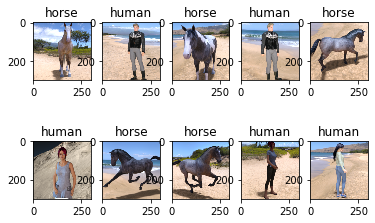

In [0]:
import matplotlib.pyplot as plt

horse_or_human = ['horse', 'human']  # label: int to str

for i, (image, label) in enumerate(zip(train_images[:10], train_labels[:10])):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title('{}'.format(horse_or_human[label]))

このデータセットはCGの馬と人がそれぞれ描かれているものであることがわかります。このような画像を入力したときに、写っているものが馬なのか人なのか分類するモデルを構築してみます。

In [0]:
from tensorflow import keras

l = keras.layers
model = keras.Sequential([
    l.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    l.MaxPooling2D(2, 2),
    l.Conv2D(32, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Conv2D(64, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Conv2D(64, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Conv2D(64, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Flatten(),
    l.Dense(512, activation='relu'),
    l.Dense(1, activation='sigmoid')                      
])

この例では、AlexNetと同様に、畳み込み層 (`Conv2D`) と最大値プーリング (`MaxPooling2D`) を5層重ねています。畳み込み層の出力は複数次元の行列になるため、それを1次元のベクトルに変換するために`Flatten`レイヤーを用います。そして、最終的に馬か人間かの分類をするために全結合ニューラルネットワークでユニット数を1個に集約して人か馬かの0か1かの分類にしています。こちらの設定で作ったモデルのサマリを視覚化すると以下の表のようになります。


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3


畳み込み処理を行うネットワークが`Output Shape`に示される行列の形で表示されています。最初の`conv2d_1`の出力の画像サイズは298×298になります。入力画像のサイズが300×300で、今回はpaddingを用いていないので、畳み込み処理ができない端のピクセルの分だけ出力が小さくなっています。最後の16という数字は、`Cond2D`の最初の引数で設定した畳み込みフィルターの数となります。その出力に対してMax Poolingを行うと今回は2×2の領域から1つの最大値を取るので、画像サイズは半分の値になります。

つぎにその出力に再度畳み込み処理を行うと、両端のピクセルは畳み込みができないため2つだけ小さくなった147×147の画像サイズになっています。つぎのMax Poolingではさらにその画像サイズが半分になるというような処理を繰り返していき、畳み込みが終わると7×7×64の行列に対してフラット化し、1次元のベクトルにします。1次元のベクトルは7×7×64＝3136個の値を取ることになります。

続く`Dense`レイヤーでは次元を512個に絞りこみ、最後の`Dense`レイヤーのユニット数を1、活性化関数にシグモイド関数を用いることで、馬か人かを0から1の数値を使って判定を行うニューラルネットワークができあがります。

出来上がったモデルに対して`compile`メソッドを使って、ここでは`RSMprop`という最適化アルゴリズムおよび評価関数として正解率（accuracy）を定義して分類問題を解いてあげます。あとは`fit`メソッドを使って訓練を行うことでモデルが出来上がります。

In [70]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.0001), metrics = ['accuracy'])
model.fit(train_images/255., train_labels, batch_size=32, epochs=5, verbose=1,
          validation_data=(test_images/255., test_labels))

Train on 1027 samples, validate on 256 samples
Epoch 1/15
1027/1027 [==============================] - 5s 5ms/sample - loss: 0.5622 - accuracy: 0.7507 - val_loss: 0.4333 - val_accuracy: 0.8281
Epoch 2/15
1027/1027 [==============================] - 3s 3ms/sample - loss: 0.2286 - accuracy: 0.9328 - val_loss: 0.9789 - val_accuracy: 0.7852
Epoch 3/15
1027/1027 [==============================] - 3s 3ms/sample - loss: 0.1244 - accuracy: 0.9552 - val_loss: 1.0293 - val_accuracy: 0.8086
Epoch 4/15
1027/1027 [==============================] - 3s 3ms/sample - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.9259 - val_accuracy: 0.8320
Epoch 5/15
1027/1027 [==============================] - 3s 3ms/sample - loss: 0.0667 - accuracy: 0.9727 - val_loss: 1.1152 - val_accuracy: 0.8281
Epoch 6/15
1027/1027 [==============================] - 3s 3ms/sample - loss: 0.0465 - accuracy: 0.9844 - val_loss: 1.2498 - val_accuracy: 0.8281
Epoch 7/15
1027/1027 [==============================] - 3s 3ms/sample - loss:

それぞれの畳み込みのレイヤーとMax Poolingのレイヤーにおいて処理を行ったあとに、入力の画像がどのようなものに変換されているかを可視化してみます。この変換後の出力は特徴マップと呼ばれます。上図に訓練されているネットワークでは、元々ランダムな値で初期化されていた畳み込みフィルターがそれぞれ別々の役割を担ってくれています。


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


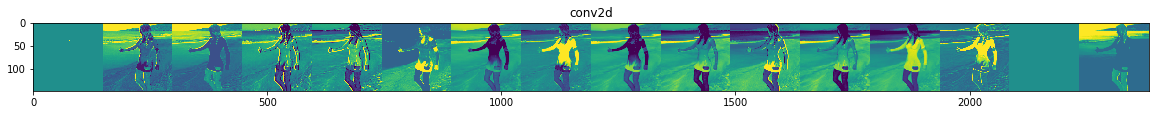

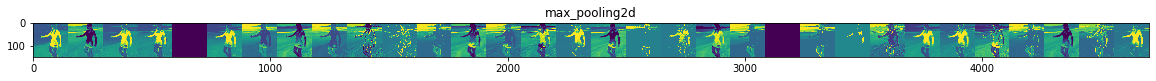

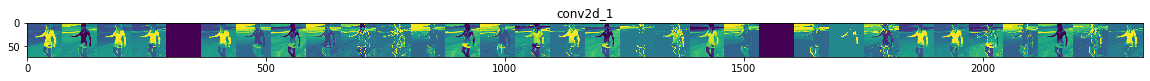

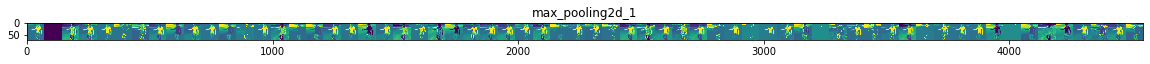

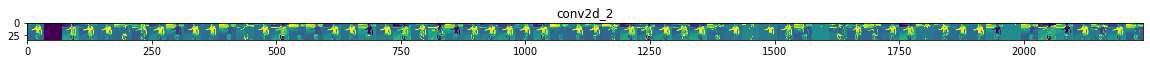

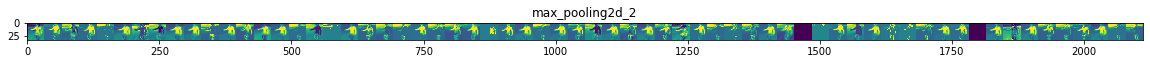

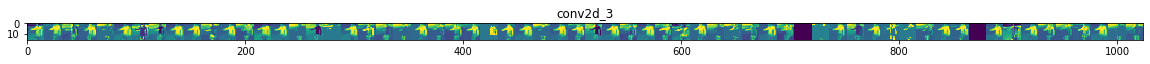

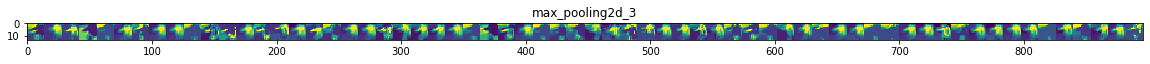

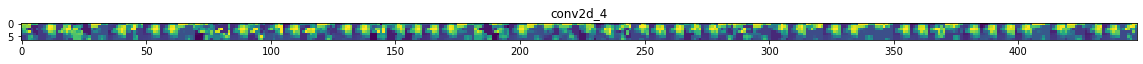

In [71]:
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# モデルの各レイヤーの出力 (中間表現) をリストとして取得
successive_outputs = [layer.output for layer in model.layers[1:]]
# 中間表現を出力とするモデルを構築
visualization_model = keras.models.Model(inputs=model.input, outputs=successive_outputs)

# 訓練データセットからランダムに一枚取得
index = random.randint(0, len(train_images))
x = train_images[index]        # x.shape == (300, 300, 3)
x = np.expand_dims(x, axis=0)  # x.shape == (1, 300, 300, 3)

# 正規化
x = x / 255.

# ランダムに取得した画像に対する中間表現を得る
successive_feature_maps = visualization_model.predict(x)

# プロットのために各レイヤーの名前をリストに格納
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    # 畳み込みとプーリングの出力のみ描画
    if len(feature_map.shape) == 4:
        # feature_map.shape: (1, size, size, n_features)
        n_features = feature_map.shape[-1]  # 特徴量の数
        size = feature_map.shape[1]
        # プロットのグリッドを準備
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # [0, 255] の範囲で綺麗に描画できるように調整
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        # 各グリッドに対して特徴量マップの描画
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

たとえば人の画像を入力すると、最初の層の出力では人の体の輪郭や色勾配の情報が出ているとか明るいところがさらに明るくなっているとか、さまざまな特徴が捉えられた別々の画像が出力されます。層がどんどん深くなっていくにつれて、もっと抽象的なもやっとした画像が得られます。ここまでいくともはや人が意味を解釈できるような特徴でなくなっていますが、ニューラルネットワークはこのようなさまざまな特徴を使って馬や人を認識できるようになります。

## 2.4 代表的な畳み込みニューラルネットワークのアーキテクチャー

機械学習やディープラーニングの領域でも、さまざまなコンペティションが開催されています。画像認識の領域で有名なImageNetコンペティション (ILSVRC) などで良い結果を収めたモデルは他のモデルの発明時にも参考として利用され、画像認識技術の発展を後押ししてきました。ここでは、有名な畳み込みニューラルネットワークのアーキテクチャーを紹介することで、CNNモデルの基本的な構造と特徴を説明します。この説明を通じてその他のアーキテクチャーについて読み解く際にも参考になる情報を提供したいと思います。


### 畳み込みニューラルネットワークの発展の足跡

畳み込みニューラルネットワークはImageNetコンペティション (ILSVRC) とともに成長してきた歴史があります。ImageNetコンペでは、2011年まではディープラーニング以外の技術を用いたチームが優勝していました。しかし、さきほど説明したAlexNetという畳み込みニューラルネットワークを使ったモデルが2012年にいきなり登場し、前年度優勝チームの分類誤差の値を10ポイント程度急激に下げ（精度を上げ）画像認識分野にブレークスルーをもたらしました。

それ以降も畳み込みニューラルネットワークを使用したさまざまモデルが登場し、以下の図のように2015年くらいまで線形的に精度が向上していきました。

![imagenet](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_imagenet.png)
<center>ImageNetコンペティションの歴代優勝モデル</center>

まず、最新のモデルでも広く用いられているResidualモジュールを導入したResNetについて紹介します。そのあと、このリストには載っていませんが、高速に物体検出を行うことができるYOLOという有名なアーキテクチャーについて説明します。



### ResNet

ResNetは2015年のImageNetコンペティションにおける優勝モデルです。何が画期的だったかというと、Residualモジュールと呼ばれるショートカットを含んだ機構を導入したところです。Residualモジュールの導入により、ディープラーニングモデルの層の数をさらに各段に増やすことに成功しました。ResNetが登場する前のディープラーニングの層の深さは、AlexNetでは8層、2014年の優勝モデルのGoogLeNetでは22層であり、その当時はこれでも非常に深い層と言われていました。ところがResNetでは、152層というすさまじい深さのネットワークが訓練できるようになりました。深さが深くなるほど複雑な特徴を捉えることができるので、より精度が高いものができあがるようになったと言えます。

![resnet_rev_depth](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_resnet_rev_depth.png)
<center>ResNetとそれまでのディープラーニングモデルの層の深さ</center>

具体的なResNetのアーキテクチャは以下の図のようになります。このブロックのひとつひとつが畳み込み層を表します（ただし、最後のブロックは平均プーリング層です）。そのブロックが合計で152層並んでいます。AlexNetの例と大きく異なる点はただ単にブロックを積み上げただけでなく、横に回り道ができているところです。この横道のことをResidual（残差）接続とかスキップコネクションと呼びます。

![resnet_arch](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_resnet_arch.png)
<center>ResNet-152のアーキテクチャー (to be replaced)</center>

下図の左の形が通常のニューラルネットワークで、ひとつのブロックが例えば畳み込み層を表します。それに対して右がResidual Netで、順方向のフローに加えて、入力をそのまま足すというもう一つの別のパスを用意してあげます。

![residual_net](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_residual_net.png)
<center>順方向接続と残差接続</center>

この機構を用いると何かうれしいのかというと、一般にモデルのパラメータを更新する際に誤差逆伝播と呼ばれるアルゴリズムを使いますが、層が深くなるにつれて誤差が伝搬しづらくなるという問題が生じてしまいます。このResidual接続による横道を用いることで、もとの誤差が減衰することなく伝えてれくるようになるため、層が深くなっても訓練が進むようになるのです。

さらに、2014年のGoogLeNetのInceptionモジュールを源流とする方法論として、Residualモジュールのようないくつかの層を塊とした単位を積み重ねていくことでニューラルネットワークを構築するような流れも生まれました。このようなモジュールを積み上げていく方式はここ数年のトレンドになっていて、2017年優勝モデルのSeNetなどでも用いられています。


下図はCIFER-10というカラー画像の一般物体認識データセットを用いた訓練の進み具合を示したものです。さきほどような単純な畳み込みニューラルネットワークを用いた場合とResNetを用いた場合の違いを表しています。横軸が訓練経過時間 (訓練データに対するパラメータ更新の回数) で、縦軸が誤り率、つまり分類を間違った割合を示しています。

図の黄色の線は層の数が20個だったときの結果で、青が32層、緑が44層、赤が56層の結果です。点線が訓練データに対するグラフで、実戦がテストデータに対するグラフを表しています。左側の単純な畳み込みニューラルネットワークの結果では、層を増やすごとに逆に誤り率が上がってしまっています。それに対して右側のResNetに対する結果では、Residual接続を追加したことにより、層が増えるにつれて誤り率が下がっているという傾向が読み取れます。

![resnet_comp](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_resnet_comp.png)
<center>残差接続があることによる学習の進み方への効果</center>



ResNetにはResidual接続以外にもバッチ正則化など、今でも用いられているいくつかの工夫がなされています。その内容についてさらに興味がある方は、DeNAの内田さんによる“畳み込みニューラルネットワークの研究動向”という素晴らしいスライドがありますのでそちらを参照することをお勧めします。 https://www.slideshare.net/ren4yu/ss-84282514


### YOLO 

YOLO (You Only Look Once) は、画像の中に写っている人や物体の検知を非常に高速に精度良く行うことができるモデルです。

![yolo_example](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_yolo_example.png)
<center>YOLOによる物体検知の出力例(to be replaced) YOLOv3ではなくてYOLOv1の例にしたい </center>

上の図のように１フレームにこれだけ多くの人や車、バイクなどがあってもそれぞれを的確に認識できています。なお、これらの矩形領域はバンディングボックス (bounding box) と呼ばれます。YOLOが人気な理由のひとつは、GPUなどのアクセラレーターを使えば非常に高速に実行できるため、動画に対してもほぼリアルタイムに処理できるところです。

下図のように、YOLOでは対象の画像をS×S (典型的には7×7) のグリッド領域に分割し、それぞれのグリッドに対して2つのバウンディングボックスを予測します。バウンディングボックスには、位置 (x, y) と大きさ (height, width)、そして、その領域に物体が写っているか、ただの背景なのかを表すスコア (box confidence score) の5つのパラメータがあります。また、バンディングボックスのパラメーターに関する予測と同時に、それぞれのグリッドがどのクラス（例えば、人、車、犬、自転車、など）に属するかを表す確率値も計算します。

![yolo_model](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_yolo_model.png)
<center>YOLO内部で行っている処理フローの概念図</center>

物体検知のタスクでよく用いられるベンチマーク用のデータセットにPASCAL VOCというものがあります。PASCAL VOCデータセットに含まれるそれぞれの画像には人手でアノテーションされたバウンディングボックスの位置、大きさ、属するクラスの情報が付与されています。クラス数は20種類です。そのため、YOLOをPASCAL VOCデータセットで訓練した場合、出力テンソルの形状は (7, 7, 2×5 + 20) = (7, 7, 30) となります。


YOLOのアーキテクチャはこの (7, 7, 30) の形のテンソルを出力するように設計されています。以下にYOLOのアーキテクチャーの概念図を示します。

![yolo_arch](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_yolo_arch.png)
<center>YOLO (v1) のアーキテクチャー</center>



YOLOもさきほど説明したAlexNetと似たように、畳み込み層とMax Pooling層を多数重ね合わせています。大きさ448×448、チャンネル数3の入力画像はこれらの変換により大きさ7×7、チャンネル数1024の特徴量マップに変換されます。その後、特徴量マップをフラット化し全結合層に渡し、4096次元のベクトルに圧縮します。そして、求めたい出力に合わせて再度ユニット数7×7×30=1470個の全結合層に渡したあと、(7, 7, 30) の形に整形します。

そして、バウンディングボックスの位置や大きさ、物体があるかただの背景か、そしてどのクラスに属するかをうまく予測できるようになるよう設計した損失関数を最小化するように訓練を進めていきます。損失関数の定義に関してはここでは深く触れません。興味のある読者はYOLOの原論文 (https://arxiv.org/abs/1506.02640) などを参考にしてください。

また、上記のように各グリッドに対して2つのバウンディングボックスを予測すると画像がバウンディングボックスで溢れてしまいます。そこで、Non Maximal Suppression (NMS) と呼ばれるアルゴリズムを用いて、余計なボックスを差っ引いていきます。大まかにいうと、確信度が低くく、他のボックスと大きく重なってしまっているボックスを除いていきます。そうすると前の図の右にあるような、犬を囲むボックス、自転車を囲むボックス、車を囲むボックスなどが最終的な出力として残ります。

YOLOには

>コラム：機械学習用の画像準備について

機械学習は入力データと答えをモデルに入れることでルールを見つけ出すような構造になっていると説明しました。今回の例のように領域とクラスを出力としたい場合に、どういう風に「答え」（アノテーション）を用意するかについて説明します。

一般にアノテーション作業にはとても時間がかかります。物体の位置を示す矩形領域の情報を付与することを考えてみましょう。まず画像から何を検知したいのか、リストを定義します。そして、それぞれの画像に対して目視でに物体が写っている場所を確認し、その物体を囲む矩形は画像内のどの座標からスタートしどの座標で閉じれば良いか確認します。そして、あとで扱いやすいようにそれぞれの画像ファイル名や矩形領域の座標値、クラス名をJSONやXMLなどのフォーマットに記録します。

とても大変ですね。最近はこのようなことを支援するツールとして便利なものが多数出てきています。例えばMicrosoftがオープンソースで公開しているVoTT (Visual Object Tagging Tool https://github.com/Microsoft/VoTT) などが挙げられます。なお、1枚1枚答えを準備しなければならないので時間はかかりますが、このようなツールのおかげでGUIで軽快にアノテーション作業を行うことができるようになりました。

![vott](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_vott.jpg)
<center>VoTTを用いたアノテーション作業画面</center>

こちらのツールは、動画とか画像があった場合に、たとえば人の画像があったらその人の画像部分をマウス等でドラッグするとその領域を記憶することができて、かつその領域はスネイプ先生ですというような情報を右のタグのところでラベルとしてまとめてクラスの関連付けを行うことができます。

VoTT意外にも個人や企業等によりさまざまな支援ツールが開発されています。もちろん、物体検知以外のタスクに対しても、例えば自然言語処理の領域のタスクのデータセットを作成するための支援ツールも多数存在します。ご興味がある方は試してみていただけるといいかと思います。


## 2.5 畳み込みニューラルネットワークの事前訓練

先ほど、ディープラーニングが現在の流行に至った要因とも言える、ImageNetコンペティション (ImageNet Large Scale Visual Recognition Challenge: ILSVRC) のお話をしました。こちらのコンペで2012年にAlexNetと呼ばれるディープラーニングベースの手法がエラー率を前年に比べ10ポイント程度改善して優勝しました。このImageNetに関連する一つの重要な話にニューラルネットワークの事前訓練というものにあります。

このコンペティションにおいては、訓練データが120万枚程度、テストデータが10万枚程度用意されています。さらに、それぞれに1000クラスのラベルがアノテーションされています。たとえば、図のような多様な鳥の画像をはじめ、ほかにも人や車や犬の画像などさまざまなものが含まれています。

![imagenet_data](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_imagenet_data.png)
<center>ImageNetデータセットに含まれる画像の例</center>


1000クラスという膨大な数の種類の物体を分類するためには、ネットワークが汎用的な特徴量を抽出し、それら特徴量から物体それぞれの違いを把握できるような能力が必要となります。逆にいうと、ImageNetデータセットをうまく分類するように訓練できたモデルは、汎用的な特徴抽出器として用いることができるようになるわけです。その特徴抽出器というものを、ImageNetのデータセットだけでなく、別の画像認識系タスクにも再利用するということがよく行われています。このようにあらかじめ大規模データセットで事前訓練したモデルを再利用できるというところがディープラーニングの強力な機能のひとつです。

画像認識に関しては、例えば一般物体認識であったり、画像の中のどこに何が映っているかのような物体検知であったり、人物の顔の認識であるとか、顔画像からその人の年齢がいくつなのかを推定するというタスクが有名です。より応用的な話では、コンクリートのひび割れなど老朽箇所を検知するとか、文字認識のタスクであったりといったものに、事前訓練したモデルを特徴量抽出器を流用できます。

特に実務の世界においては分類したい物体に対して訓練用の画像を十分な数用意できないといった問題がよく起こります。そういう場合にも事前訓練済みのモデルが有効なことが多いです。事前訓練のモデルを入手するには様々な方法が、ここではTensorFlow Hubにて公開されているモデルを用いる方法について紹介します。








### TensorFlow Hubの公開モデルを利用する

TensorFlow Hub (https://tfhub.dev/) はTensorFlowで構築された訓練済みのディープラーニングモデルを公開、検索、利用するためのプラットフォームです。画像認識のモデルだけでなく、GAN (Generative Adversarial Network) に代表されるような画像生成モデルであったり、画像のスタイル変換や、物体検知のモデルも公開されています。また、ビデオ解析用のモデルや次章で扱う自然言語処理のモデルなどもあります。

TensorFlow Hubのページ (https://tfhub.dev/) にアクセスし、左方のタブより "All models" をクリックすると次のような画面が表示されます。

![tfhub](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_tfhub.png)
<center>TensorFlow Hubの画面</center>

ここに表示されているカードそれぞれがひとつひとつのモデルに対応しています。例えば、上方の検索バーに "resnet" と入力しエンターキーを押すと、先述のResNet関連のモデルが多数表示されます。この中の `imagenet/resnet_v2_50/classification` と名前がつけられているモデルは、(1) ImageNetデータセットで学習された、(2) 50層のResNet (v2) の、(3) 分類層付き、を表します。似たような名前の `imagenet/resnet_v2_50/feature_vector` は分類層を除いた特徴量抽出器として利用できます。

文章だけの説明ではわかりにくいので、以下でコードを追いながら使い方を確認してみましょう。まず、サンプル画像としてウミガメの写真を用意します。

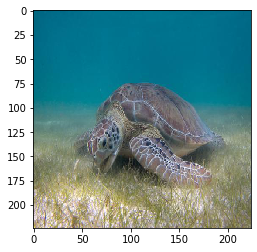

In [39]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

image_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg'
image_path = keras.utils.get_file('turtle.jpg', image_url)
image = load_img(image_path, target_size=(224, 224))
image_numpy = img_to_array(image).astype(np.uint8)

plt.imshow(image_numpy)

TensorFlow Hubから50層のResNetモデルをダウンロードし、ウミガメ画像の分類を行ってみましょう。TensorFlow Hubは `tensorflow_hub` モジュールをインポートすれば利用できます。先ほどの `imagenet/resnet_v2_50/classification` のページにアクセスし、オレンジ色の "Copy URL to clipboard" をクリックし、"Saved Model"形式のモデルのURLを取得してください。

![resnet_v2_50](https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/notebooks/figures/chap02_resnet_v2_50.png)
<center>TensorFlow HubのResNet V2 50のページ</center>

なお、モデルの概要もこちらのページで確認できます。ResNet v1とv2の違いなどにも触れられていますので興味のある読者はご確認ください。TensorFlow Hubにあるモデルの利用法はとても簡単で、モデルを積み重ねるのに利用する `Sequential` にTensorFlow Hubの `KerasLayer` を追加するだけです。`KerasLayer` の引数としてモデルのURLと、入力するテンソル (画像) の形状を指定します。

In [0]:
from tensorflow import keras
import tensorflow_hub as hub

classifier_url = 'https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4'
classifier = keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=(224, 224, 3))
])

これでモデルが準備できました。ウミガメの画像にミニバッチの次元を追加し、\[0, 255\] で表現されている輝度値を \[0, 1\] の範囲に正規化しましょう。こちらの画像のテンソルをモデルのクラス予測メソッド (`classifier.predict_classes`) に入力すると、ImageNetの1000クラスのうち `[34]` というインデックスに対応するクラスであると予測されるはずです。

[34]


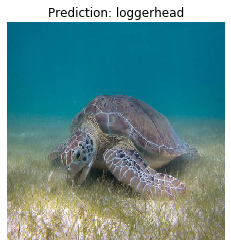

In [50]:
import numpy as np

# ミニバッチ次元の追加と正規化
input_tensor = np.expand_dims(image_numpy, axis=0)
input_tensor = input_tensor / 255.

# 訓練済みモデルによる画像分類
predicted_class = classifier.predict_classes(input_tensor)
print(predicted_class)  # [34]

# インデックス (34) をクラス名に変換するテーブルを取得
labels_path = keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# 画像と予測クラス名を描画
plt.imshow(image_numpy)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class[0]]
_ = plt.title("Prediction: " + predicted_class_name)

ImageNetのインデックスとラベルの対応表を見ると、インデックス34はloggerhead (ウミガメ) に対応することがわかります。うまく分類できていますね。

### 事前訓練済みモデルの転移学習

では、事前訓練済みのモデルを別のタスクに対して再利用する方法について考えていきましょう。もちろん、データセット内に画像が十分数あればモデル全体のパラメーターをそのまま更新していけばよいでしょう。データを十分に用意できない場合はどうでしょう。パラメーターの数に比べてあまりにもデータが少ないとデータに対して過学習してしまったり、そもそも十分に学習できない問題が起きてしまうでしょう。

そこでよく用いられるテクニックが転移学習です。訓練済みモデルの出力層だけを付け替えて、新しい出力層のパラメーターのみを更新する手法を転移学習と呼びます。こうすることで、訓練済みモデルを特徴量抽出器として利用し、抽出された特徴量を用いてシンプルな分類を行うモデルを構築できます。出力層以外のパラメーターも一部更新するファインチューニングという手法もありますが、ここでは転移学習のやり方を紹介します。

まずは先ほども利用した馬と人間のCG画像データセットを準備してみましょう。

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

train_data, info = tfds.load('horses_or_humans', split=tfds.Split.TRAIN, batch_size=-1, with_info=True)
test_data = tfds.load('horses_or_humans', split=tfds.Split.TEST, batch_size=-1)

train_dict = tfds.as_numpy(train_data)
test_dict = tfds.as_numpy(test_data)

train_images, train_labels = train_dict['image'], train_dict['label']
test_images, test_labels = test_dict['image'], test_dict['label']

train_images = tf.image.resize(train_images, (224, 224)) / 255.
test_images = tf.image.resize(test_images, (224, 224)) / 255

次に、50層のResNet v2の出力層を除いたモデルを持ってきます。TensorFlow Hubの`imagenet/resnet_v2_50/feature_vector`のモデルのページにアクセスし、URLをコピーしてください。そして、`Sequential`に`KerasLayer`を追加しましょう。今回は事前学習モデルをパラメーター固定の特徴量抽出器として利用するので、`trainable`引数には`False`を指定します。その後ろに全結合層 (`Dense`) を追加すれば、新しいデータセットに合わせたResNetモデルの完成です。分類するのは馬と人間の0/1として、全結合層のユニット数は1つ、活性化関数はシグモイド関数としています。

In [0]:
from tensorflow import keras
import tensorflow_hub as hub

feature_extractor_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'

model = keras.Sequential([
    hub.KerasLayer(feature_extractor_url, input_shape=(224, 224, 3), trainable=False),
    keras.layers.Dense(1, activation='sigmoid')
])

モデルのサマリーを表示すると以下のように、`KerasLayer`として抽象化されたResNetと全結合層それぞれの出力テンソルの形状とパラメーター数がわかります。`Trainable params: 2,049`となっており、訓練対象のパラメーターは全結合層周りの重みとバイアスであることに注意してください。

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


それでは、こちらのモデルをコンパイルし、訓練してみましょう。

In [58]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=32, epochs=2)

Train on 1027 samples
Epoch 1/2
1027/1027 [==============================] - 6s 6ms/sample - loss: 0.1839 - accuracy: 0.9426
Epoch 2/2
1027/1027 [==============================] - 3s 3ms/sample - loss: 0.0116 - accuracy: 0.9981


テストデータに対して予測と正解の混合行列を作ってみると、完全にうまく分類できていることがわかります。

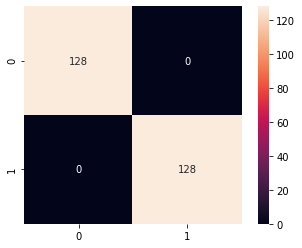

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_classes = model.predict_classes(test_images)

cmx = confusion_matrix(test_labels, predicted_classes)
sns.heatmap(cmx, annot=True, fmt='g', square=True)

なお、モデルの保存は`save`メソッドを用います。`save_format='tf'`を指定するとTensorFlowの`SavedModel`フォーマットで保存できます。後々モデルをデプロイする際に便利なので今回はこのフォーマットで保存します。

In [60]:
model.save('/tmp/saved_model', save_format='tf')

INFO:tensorflow:Assets written to: /tmp/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/saved_model/assets


保存したモデルをロードする場合は`tf.keras.models.load_model`メソッドで保存したディレクトリを指定します。

In [0]:
reloaded_model = keras.models.load_model('/tmp/saved_model')

## 2.6 まとめ

これで畳み込みニューラルネットワークとコンピュータービジョンの解説は終わりです。コンピュータービジョンのアプリケーションを紹介した後、畳み込みとはどういう操作を行っているか、層を深くするとどういった特徴が得られていくか、ResNetやYOLOといった代表的なアーキテクチャーについて紹介し、事前訓練モデルの利用方法に関して解説しました。

次章ではディープラーニングの応用先としてコンピュータービジョンと双璧をなす、自然言語処理について説明していきます。